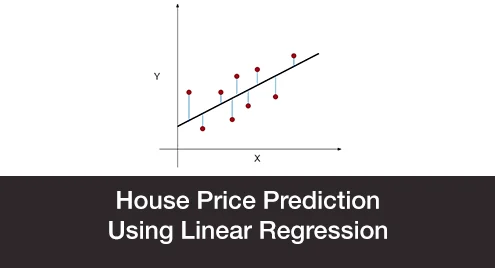

### IMPORT MODULES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

### LOADING THE DATASET

In [2]:
data=pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data=data.drop(['ocean_proximity'],axis=1)


In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### DATA EXPLORATION

In [5]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
from sklearn.model_selection import train_test_split
x= data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [9]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 

In [12]:
train_data=x_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1319,-121.88,38.03,10.0,2769.0,619.0,1045.0,469.0,4.1111,158600.0
13529,-117.32,34.17,6.0,5661.0,1287.0,2943.0,1162.0,3.6362,106500.0
3707,-118.39,34.20,19.0,2012.0,732.0,3483.0,731.0,2.2234,181300.0
16942,-122.31,37.56,52.0,2351.0,494.0,1126.0,482.0,3.9688,356900.0
9155,-118.53,34.45,10.0,5509.0,969.0,3002.0,959.0,5.5981,220100.0
...,...,...,...,...,...,...,...,...,...
6832,-118.12,34.08,52.0,1437.0,290.0,980.0,282.0,5.3032,245700.0
7058,-118.04,33.92,34.0,1995.0,417.0,1573.0,407.0,3.4907,153500.0
9924,-122.32,38.32,26.0,2710.0,498.0,1439.0,484.0,5.0000,175200.0
9540,-120.69,37.40,46.0,860.0,130.0,496.0,147.0,3.5167,137500.0


### DATA ANALYSIS

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

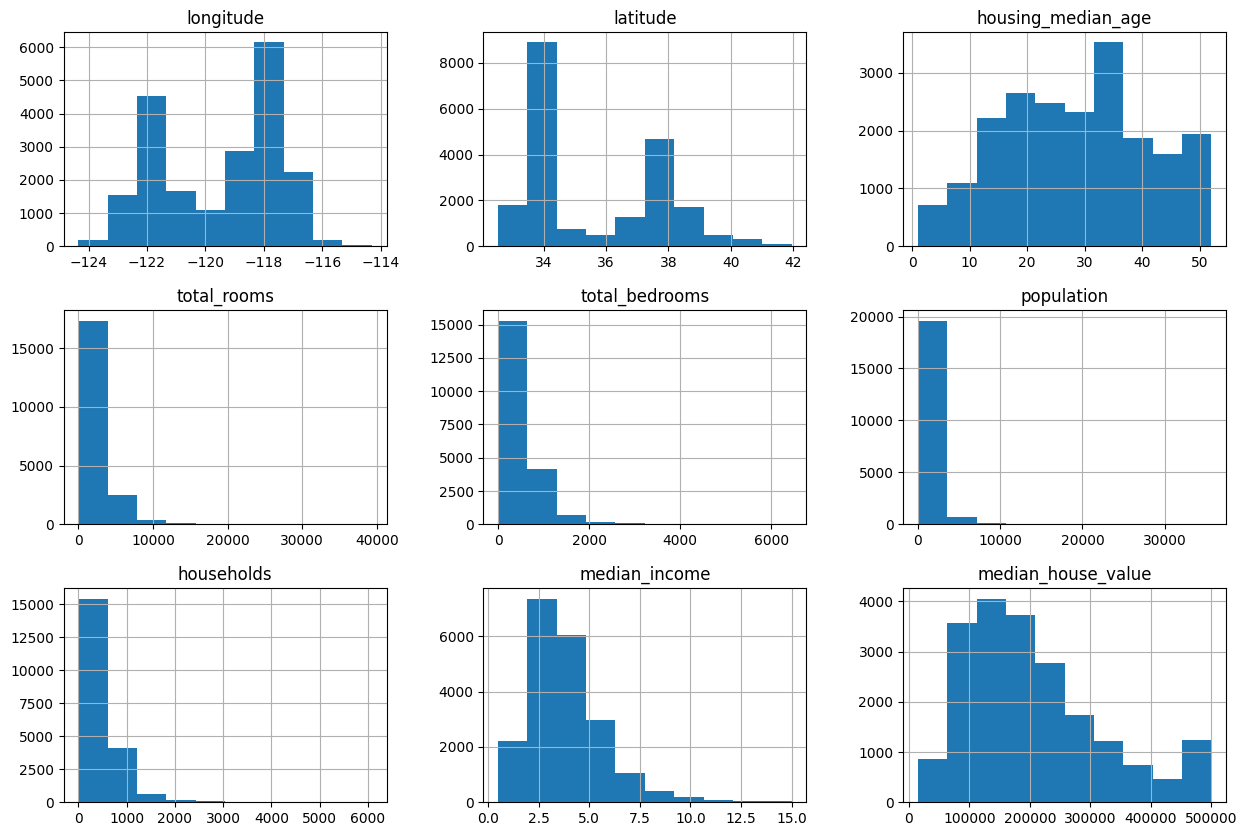

In [14]:
data.hist(figsize=(15,10))

### CORRELATION MATRIX

In [15]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

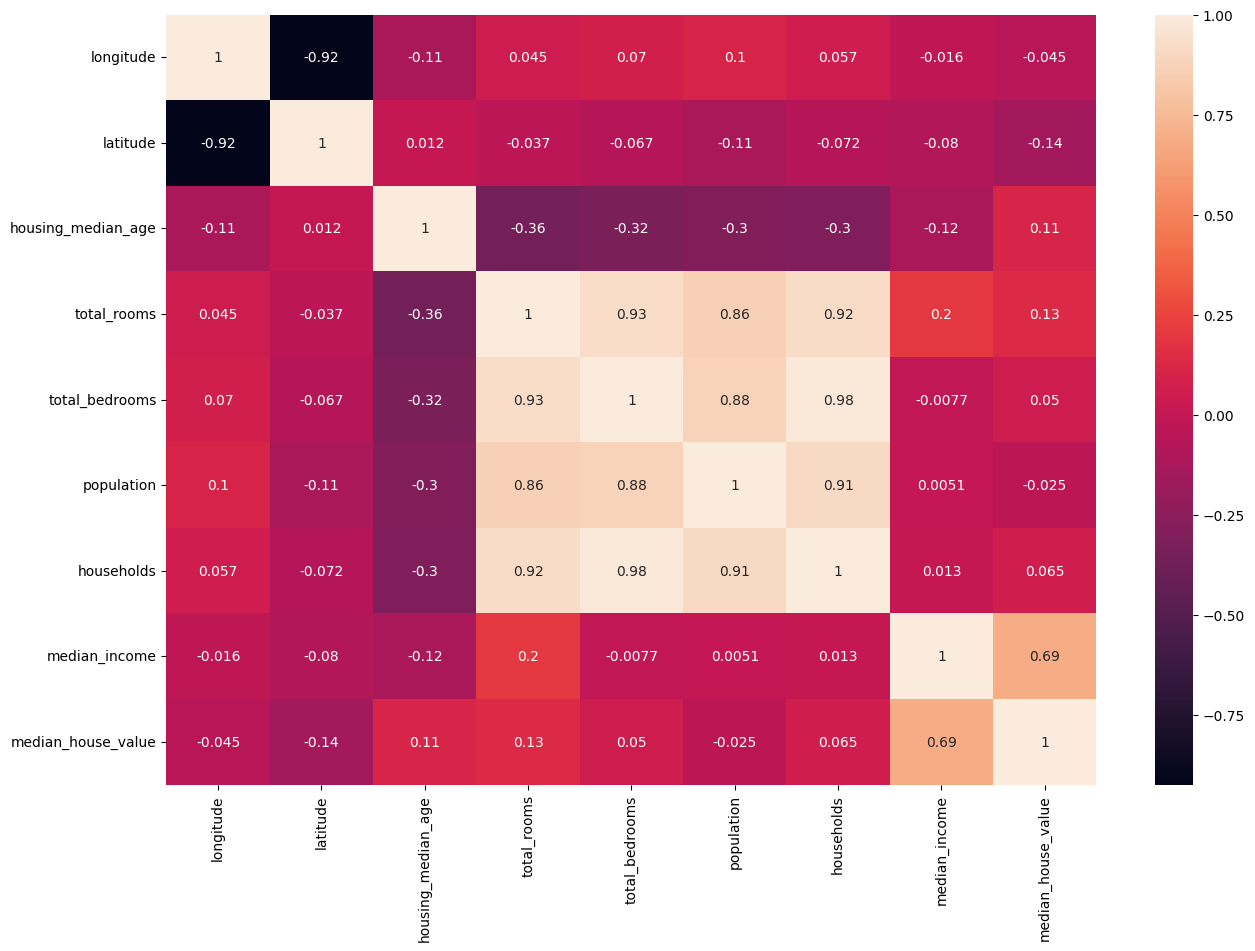

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [17]:
train_data['total_rooms']= np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] +1)
train_data['population']= np.log(train_data['population'] + 1)
train_data['households']= np.log(train_data['households'] + 1)


In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1319,-121.88,38.03,10.0,7.926603,6.429719,6.952729,6.152733,4.1111,158600.0
13529,-117.32,34.17,6.0,8.641532,7.160846,7.987524,7.058758,3.6362,106500.0
3707,-118.39,34.20,19.0,7.607381,6.597146,8.155936,6.595781,2.2234,181300.0
16942,-122.31,37.56,52.0,7.763021,6.204558,7.027315,6.180017,3.9688,356900.0
9155,-118.53,34.45,10.0,8.614320,6.877296,8.007367,6.866933,5.5981,220100.0
...,...,...,...,...,...,...,...,...,...
6832,-118.12,34.08,52.0,7.271009,5.673323,6.888572,5.645447,5.3032,245700.0
7058,-118.04,33.92,34.0,7.598900,6.035481,7.361375,6.011267,3.4907,153500.0
9924,-122.32,38.32,26.0,7.905073,6.212606,7.272398,6.184149,5.0000,175200.0
9540,-120.69,37.40,46.0,6.758095,4.875197,6.208590,4.997212,3.5167,137500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

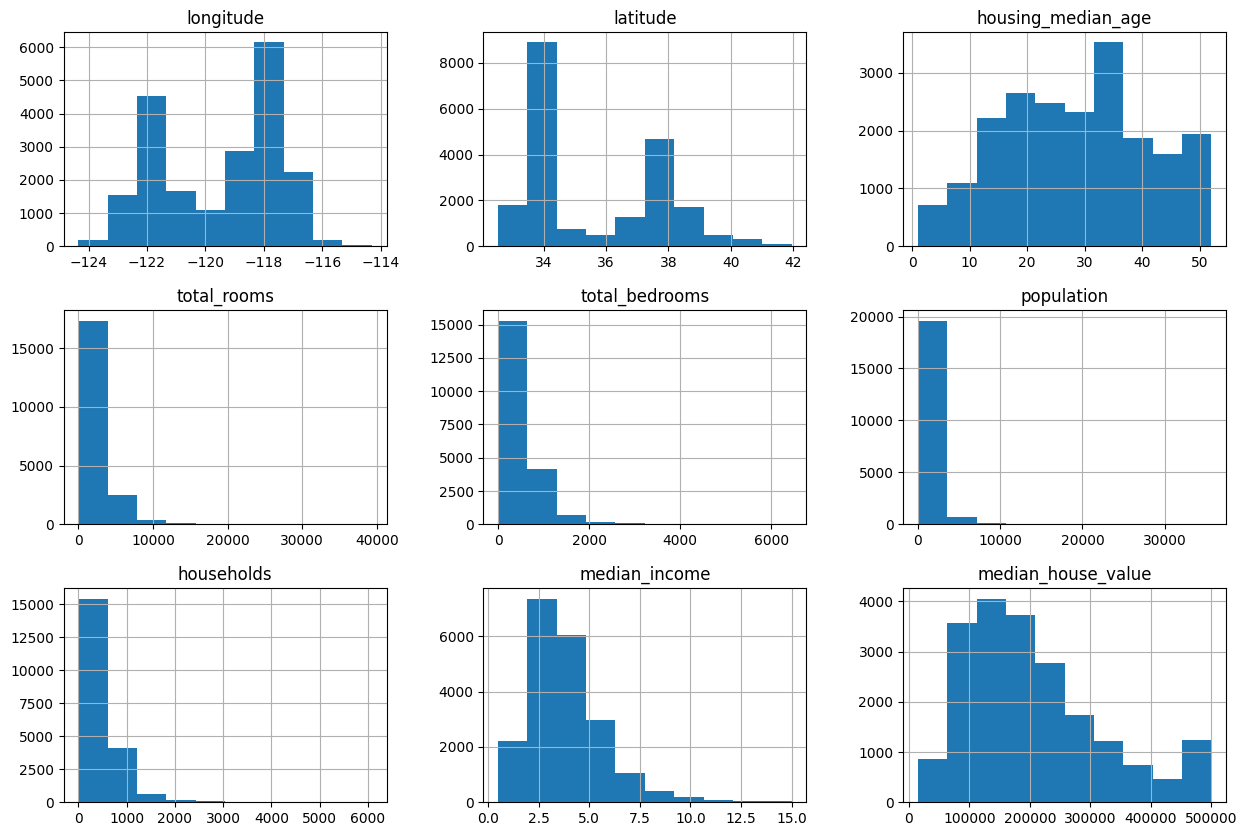

In [19]:
data.hist(figsize=(15,10))

### DATA VISUALISATION

<Axes: xlabel='latitude', ylabel='longitude'>

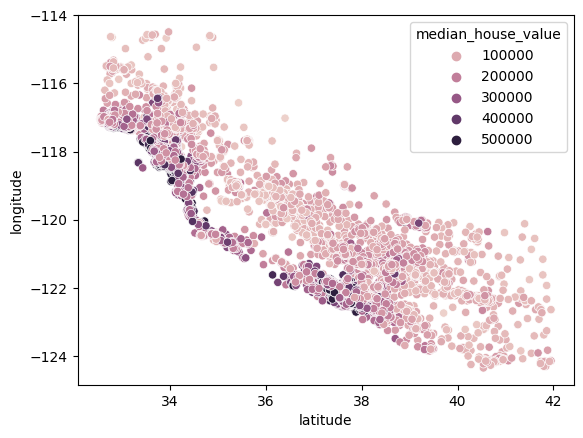

In [20]:
 sns.scatterplot(x='latitude',y='longitude',data=train_data, hue='median_house_value')

<Axes: xlabel='total_bedrooms', ylabel='total_rooms'>

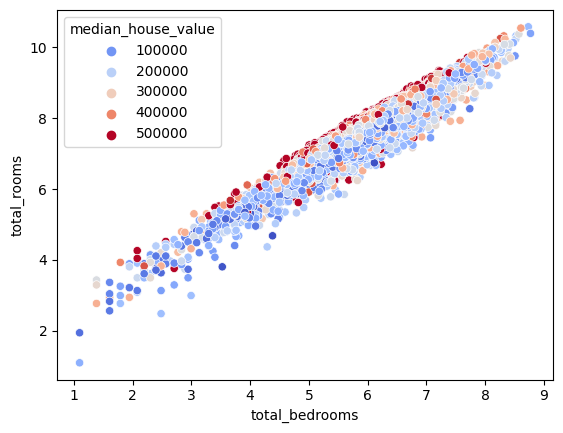

In [21]:
sns.scatterplot(x='total_bedrooms',y='total_rooms',data=train_data, hue='median_house_value',palette="coolwarm")

In [22]:
train_data['bedroom_ratio']= train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms'] / train_data['households']


<Axes: xlabel='bedroom_ratio', ylabel='household_rooms'>

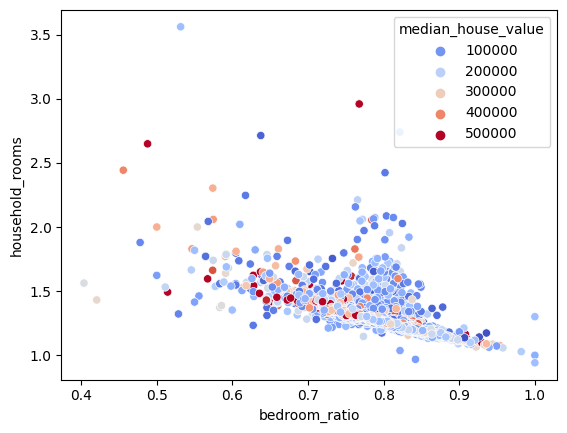

In [23]:
sns.scatterplot(x='bedroom_ratio',y='household_rooms',data=train_data, hue='median_house_value',palette="coolwarm")

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms
1319,-121.88,38.03,10.0,7.926603,6.429719,6.952729,6.152733,4.1111,158600.0,0.811157,1.288306
13529,-117.32,34.17,6.0,8.641532,7.160846,7.987524,7.058758,3.6362,106500.0,0.828655,1.224228
3707,-118.39,34.20,19.0,7.607381,6.597146,8.155936,6.595781,2.2234,181300.0,0.867203,1.153371
16942,-122.31,37.56,52.0,7.763021,6.204558,7.027315,6.180017,3.9688,356900.0,0.799245,1.256149
9155,-118.53,34.45,10.0,8.614320,6.877296,8.007367,6.866933,5.5981,220100.0,0.798356,1.254464
...,...,...,...,...,...,...,...,...,...,...,...
6832,-118.12,34.08,52.0,7.271009,5.673323,6.888572,5.645447,5.3032,245700.0,0.780266,1.287942
7058,-118.04,33.92,34.0,7.598900,6.035481,7.361375,6.011267,3.4907,153500.0,0.794257,1.264110
9924,-122.32,38.32,26.0,7.905073,6.212606,7.272398,6.184149,5.0000,175200.0,0.785901,1.278280
9540,-120.69,37.40,46.0,6.758095,4.875197,6.208590,4.997212,3.5167,137500.0,0.721386,1.352373


<Axes: >

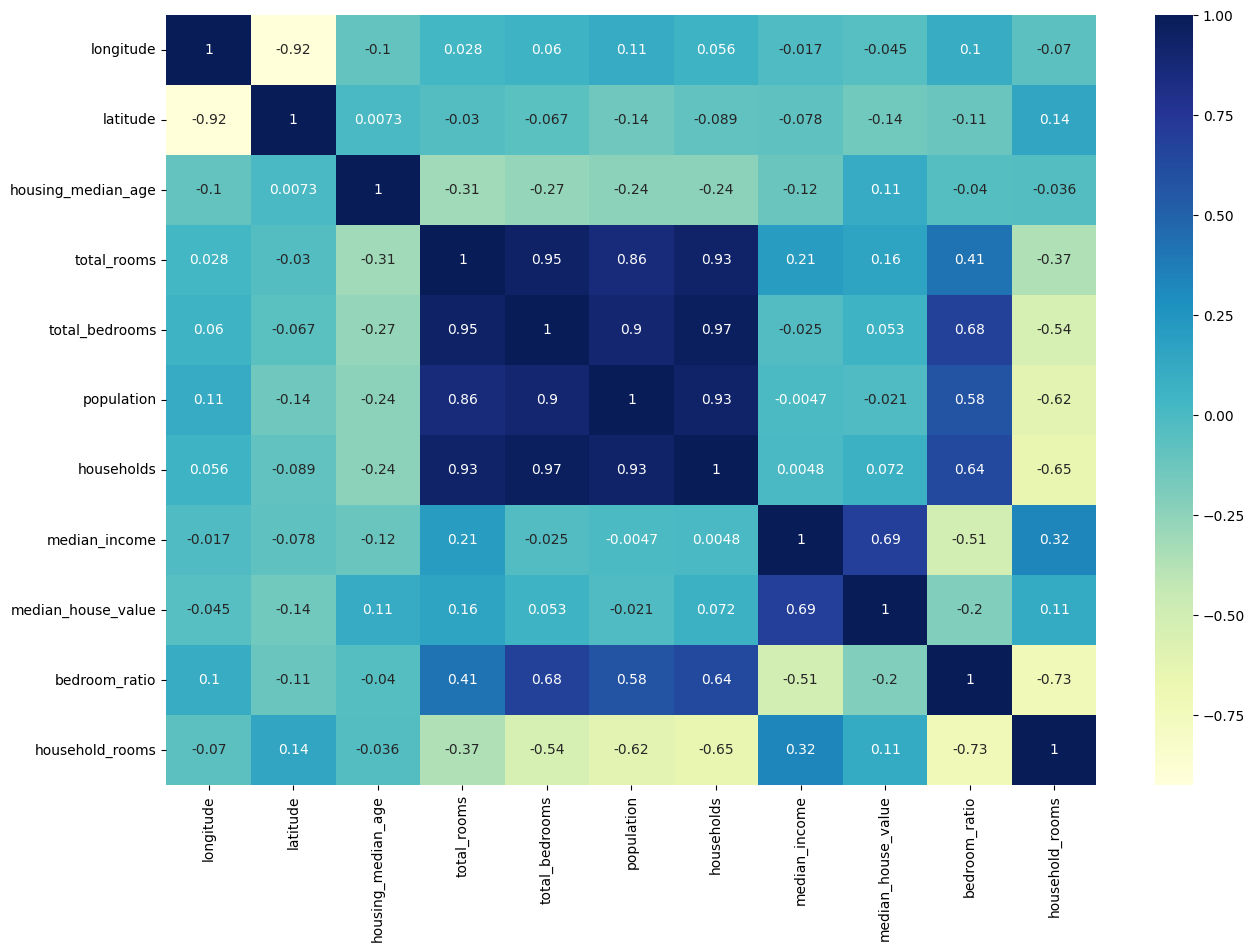

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

### TRAINING AND TESTING

In [26]:
train_data.dropna(inplace=True)


In [27]:
# y_train.info()

In [28]:
from sklearn.model_selection import train_test_split
x= data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [31]:
X=train_data.drop(['median_house_value'],axis=1)
Y=train_data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [32]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,household_rooms
1319,-121.88,38.03,10.0,7.926603,6.429719,6.952729,6.152733,4.1111,0.811157,1.288306
13529,-117.32,34.17,6.0,8.641532,7.160846,7.987524,7.058758,3.6362,0.828655,1.224228
3707,-118.39,34.20,19.0,7.607381,6.597146,8.155936,6.595781,2.2234,0.867203,1.153371
16942,-122.31,37.56,52.0,7.763021,6.204558,7.027315,6.180017,3.9688,0.799245,1.256149
9155,-118.53,34.45,10.0,8.614320,6.877296,8.007367,6.866933,5.5981,0.798356,1.254464
...,...,...,...,...,...,...,...,...,...,...
6832,-118.12,34.08,52.0,7.271009,5.673323,6.888572,5.645447,5.3032,0.780266,1.287942
7058,-118.04,33.92,34.0,7.598900,6.035481,7.361375,6.011267,3.4907,0.794257,1.264110
9924,-122.32,38.32,26.0,7.905073,6.212606,7.272398,6.184149,5.0000,0.785901,1.278280
9540,-120.69,37.40,46.0,6.758095,4.875197,6.208590,4.997212,3.5167,0.721386,1.352373


In [33]:
Y

1319     158600.0
13529    106500.0
3707     181300.0
16942    356900.0
9155     220100.0
           ...   
6832     245700.0
7058     153500.0
9924     175200.0
9540     137500.0
4209     170000.0
Name: median_house_value, Length: 16346, dtype: float64

In [34]:
model=LinearRegression()
model.fit(x_train,y_train)
print("Linear Regression Accuracy: ",model.score(x_test,y_test)*100)

Linear Regression Accuracy:  67.29443558655424


In [35]:
model

LinearRegression()

In [36]:
import pickle
fname='neww.sav'
pickle.dump(model,open(fname,'wb'))

In [37]:
load_model=pickle.load(open(fname,'rb'))

In [38]:
load_model.predict([[-118.05,33.73,25.0,7.813187,6.111467,7.171657,6.148468,5.0699,0.782199,1.270753]])

array([261532.19351016])

In [39]:
load_model.predict([[-121.94,37.54,27.0,8.220403,6.267201,7.397562,6.289716,6.2179,0.762396,1.306959]])

array([295238.92733208])

In [40]:
load_model.predict([[-122.50,37.74,42.0,7.419381,5.981414,6.948897,5.961005,3.9583,0.806188,1.244653]])

array([267153.97893341])

In [41]:
load_model.predict([[-118.04,33.92,34.0,7.598900,6.035481,7.361375,6.011267,3.4907,0.794257,1.264110]])

array([175332.58938975])